## Importamos las funciones que necesitaremos para el análisis

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importamos el csv para el análisis

In [202]:
market = pd.read_csv("output/clean_csv.csv")

In [203]:
market.head(10)

,distrito,numero_distrito,barrio,numero_barrio,tipo,nueva_construccion,metros2_const,n_habitaciones,n_banos,jardin,piscina,parking,precio_venta,eurosm2_distrito,eurosm2_barrio
0,Villaverde,District 21,San Cristóbal,Neighborhood 135,Pisos,False,64.0,2,1.0,False,False,False,85000,1328,1308.89
1,Villaverde,District 21,Los Ángeles,Neighborhood 132,Pisos,False,70.0,3,1.0,False,False,False,129900,1856,1796.68
2,Villaverde,District 21,San Andrés,Neighborhood 134,Pisos,False,94.0,2,2.0,False,False,False,144247,1535,1617.18
3,Villaverde,District 21,San Andrés,Neighborhood 134,Pisos,False,64.0,2,1.0,False,False,False,109900,1717,1617.18
4,Villaverde,District 21,Los Rosales,Neighborhood 133,Pisos,False,108.0,2,2.0,False,True,True,260000,2407,1827.79
5,Villaverde,District 21,San Andrés,Neighborhood 134,Pisos,False,126.0,4,2.0,False,False,True,195000,1548,1617.18
6,Villaverde,District 21,San Andrés,Neighborhood 134,Pisos,False,120.0,5,2.0,False,True,True,190000,1583,1617.18
7,Villaverde,District 21,San Andrés,Neighborhood 134,Pisos,False,125.0,3,2.0,False,False,False,198500,1588,1617.18
8,Villaverde,District 21,Butarque,Neighborhood 131,Pisos,False,84.0,3,2.0,False,True,True,212000,2524,2197.8
9,Villaverde,District 21,Los Rosales,Neighborhood 133,Pisos,False,85.0,2,1.0,False,False,False,131400,1546,1827.79


# Tenemos un cliente interesado en invertir en el mercado inmobiliario de lujo mediante la compra de activos ya existentes y tenemos que convencerle de que Madrid es la mejor ciudad para sus inversiones. Para ello, contamos con los datos de los inmuebles en venta de esta ciudad.

##### 1. Analizamos las zonas donde exista mayor volumen de activos de lujo en venta según características del cliente ( m2 > 200, jardín, piscina, parking propio)

In [204]:
target = market[(market.metros2_const > 200) & (market.jardin == True) & (market.piscina == True) & (market.parking == True) & (market.tipo != "Pisos")].reset_index()

In [205]:
target.shape

(888, 16)

In [206]:
dis_zonal = target.groupby("distrito")["distrito"].count().sort_values(ascending = False)
display(dis_zonal)

distrito
Moncloa              324
Hortaleza            297
Fuencarral           166
Chamartín             72
Villa de Vallecas     10
Vicálvaro              7
Ciudad Lineal          4
Chamberí               4
Barajas                2
Salamanca              1
Carabanchel            1
Name: distrito, dtype: int64

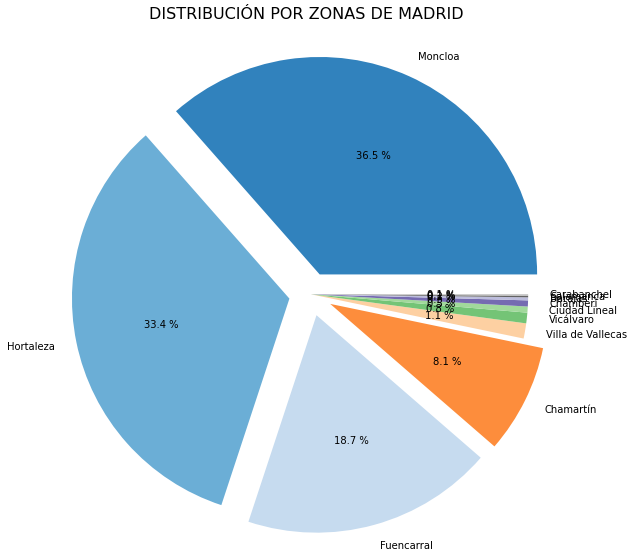

In [207]:
labels = ['Moncloa', 'Hortaleza', 'Fuencarral', 'Chamartín', 'Villa de Vallecas', 'Vicálvaro', 'Ciudad Lineal', 'Chamberí', 'Barajas', 'Salamanca', 'Carabanchel']
explode = [0.2,0.2,0.2,0.2,0,0,0,0,0,0,0]
fig = plt.figure(figsize = (5,5))
theme = plt.get_cmap('tab20c')
plt.pie(dis_zonal, labels = labels, autopct = "%0.1f %%", radius = 2, explode = explode, colors = [theme(1. * i / len(labels)) for i in range(len(labels))])
plt.suptitle("DISTRIBUCIÓN POR ZONAS DE MADRID", y = 1.3, fontsize = 16)
plt.show()

##### 2. Analizamos el precio medio de venta por distrito según características del cliente ( m2 > 200, jardín, piscina, parking propio)

In [208]:
precio_medio_distrito = target.groupby("distrito")["precio_venta"].mean().sort_values(ascending = False).astype('int64')
precio_medio_distrito

distrito
Chamartín            3572444
Chamberí             2685000
Hortaleza            2022107
Moncloa              1811756
Fuencarral           1574647
Salamanca            1495000
Ciudad Lineal        1020000
Barajas               792500
Carabanchel           597000
Villa de Vallecas     543700
Vicálvaro             360585
Name: precio_venta, dtype: int64

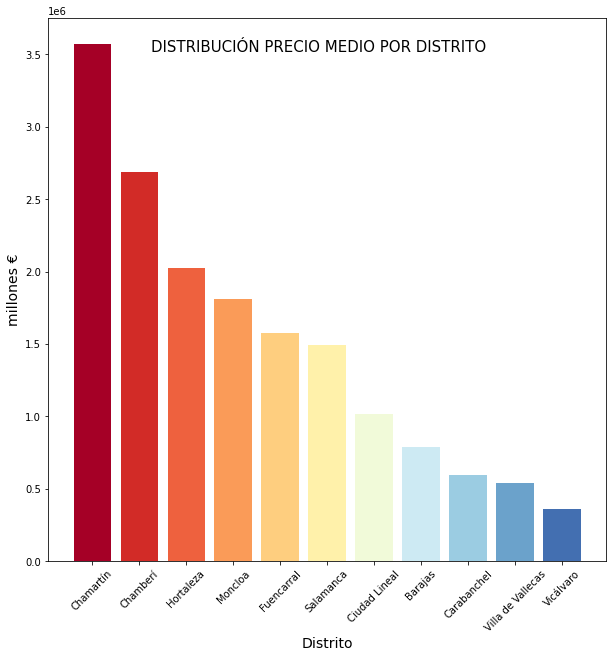

In [209]:
fig, ax = plt.subplots(figsize = (10,10))
x = ['Chamartín', 'Chamberí', 'Hortaleza', 'Moncloa', 'Fuencarral', 'Salamanca', 'Ciudad Lineal', 'Barajas', 'Carabanchel', 'Villa de Vallecas', 'Vicálvaro']
theme1 = plt.get_cmap('RdYlBu')
plt.bar(x, precio_medio_distrito, color = [theme1(1. * i / len(x)) for i in range(len(x))])
ax.set_xticks(x)
ax.set_xticklabels(x, rotation = 45)
plt.xlabel("Distrito", fontsize = 14)
plt.ylabel("millones €", fontsize = 14)
plt.suptitle("DISTRIBUCIÓN PRECIO MEDIO POR DISTRITO", y = 0.85, fontsize = 15)
plt.show()

##### 3. Mostramos gráficamento el precio de los activos según los m2 construidos y según características del cliente ( m2 > 200, jardín, piscina, parking propio)

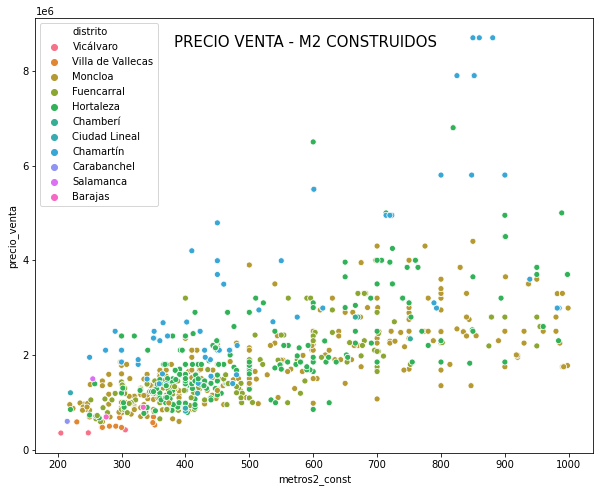

In [210]:
fig = plt.figure(figsize = (10,8))
sns.scatterplot(x = "metros2_const", y = "precio_venta", data = target, hue = "distrito")
plt.suptitle("PRECIO VENTA - M2 CONSTRUIDOS", y = 0.85, fontsize = 15)
plt.show()

##### 4. Ofrecemos varios activos en los distritos donde disponemos de mayor volumen de éstos filtrando por nueva construcción y que no sean pisos.

In [211]:
casos = ['Moncloa', 'Hortaleza', 'Fuencarral', 'Chamartín']
for i in casos:
    display(target[["distrito", "barrio", "tipo", "metros2_const", "n_habitaciones", "n_banos", "precio_venta", "eurosm2_barrio"]][(target.nueva_construccion == True) & (target.distrito == i) & (target.tipo != "Pisos")].reset_index()[0:10])

,index,distrito,barrio,tipo,metros2_const,n_habitaciones,n_banos,precio_venta,eurosm2_barrio
0,82,Moncloa,Ciudad Universitaria,Casa o chalet,418.0,5,6.0,2100000,3810.08
1,135,Moncloa,Aravaca,Casa o chalet,600.0,6,6.0,2275000,3600.4
2,155,Moncloa,Ciudad Universitaria,Casa o chalet,424.0,5,7.0,1700000,3810.08
3,156,Moncloa,Ciudad Universitaria,Casa o chalet,380.0,4,4.0,1390000,3810.08
4,170,Moncloa,Valdemarín,Casa o chalet,347.0,3,4.0,1199000,4249.04
5,205,Moncloa,Ciudad Universitaria,Casa o chalet,674.0,5,5.0,2800000,3810.08
6,206,Moncloa,Ciudad Universitaria,Casa o chalet,662.0,5,5.0,2900000,3810.08
7,207,Moncloa,Ciudad Universitaria,Casa o chalet,780.0,5,5.0,3200000,3810.08
8,208,Moncloa,Ciudad Universitaria,Casa o chalet,701.0,5,5.0,3000000,3810.08
9,209,Moncloa,Valdemarín,Casa o chalet,360.0,4,3.0,1675000,4249.04


,index,distrito,barrio,tipo,metros2_const,n_habitaciones,n_banos,precio_venta,eurosm2_barrio
0,666,Hortaleza,Valdebebas - Valdefuentes,Casa o chalet,260.0,5,3.0,710000,3607.13
1,679,Hortaleza,Valdebebas - Valdefuentes,Casa o chalet,399.0,4,3.0,875000,3607.13


,index,distrito,barrio,tipo,metros2_const,n_habitaciones,n_banos,precio_venta,eurosm2_barrio
0,347,Fuencarral,Peñagrande,Casa o chalet,315.0,4,3.0,993000,3271.96
1,348,Fuencarral,Peñagrande,Casa o chalet,312.0,4,3.0,970000,3271.96
2,397,Fuencarral,Peñagrande,Casa o chalet,388.0,5,6.0,1450000,3271.96
3,398,Fuencarral,Peñagrande,Casa o chalet,368.0,5,6.0,1460000,3271.96
4,399,Fuencarral,Peñagrande,Casa o chalet,397.0,5,6.0,1570000,3271.96
5,400,Fuencarral,Peñagrande,Casa o chalet,417.0,5,6.0,1590000,3271.96
6,403,Fuencarral,Montecarmelo,Casa o chalet,300.0,5,3.0,1430000,4610.95
7,404,Fuencarral,Montecarmelo,Casa o chalet,302.0,4,4.0,1370000,4610.95
8,445,Fuencarral,Peñagrande,Casa o chalet,375.0,6,6.0,1070000,3271.96
9,450,Fuencarral,Montecarmelo,Casa o chalet,302.0,5,3.0,1324000,4610.95


,index,distrito,barrio,tipo,metros2_const,n_habitaciones,n_banos,precio_venta,eurosm2_barrio
0,811,Chamartín,El Viso,Casa o chalet,450.0,5,6.0,4790000,6255.45


##### 5. Realizamos el mismo estudio pero en este caso teniendo en cuenta sólo pisos según características del cliente ( m2 > 150, piscina, parking propio)

In [212]:
target2 = market[(market.metros2_const > 150) & (market.tipo == "Pisos") & (market.piscina == True) & (market.parking == True)].reset_index()

In [213]:
target2.shape

(709, 16)

##### 6. Volumen de pisos por distrito según características del cliente ( m2 > 150, piscina, parking propio)

In [214]:
dis_volumen = target2.groupby("distrito")["distrito"].count().sort_values(ascending = False)[0:10]
display(dis_volumen)

distrito
Hortaleza        137
Fuencarral       137
Moncloa          125
Chamartín        121
Ciudad Lineal     92
Chamberí          32
Retiro            20
Villaverde         7
Salamanca          7
Vicálvaro          7
Name: distrito, dtype: int64

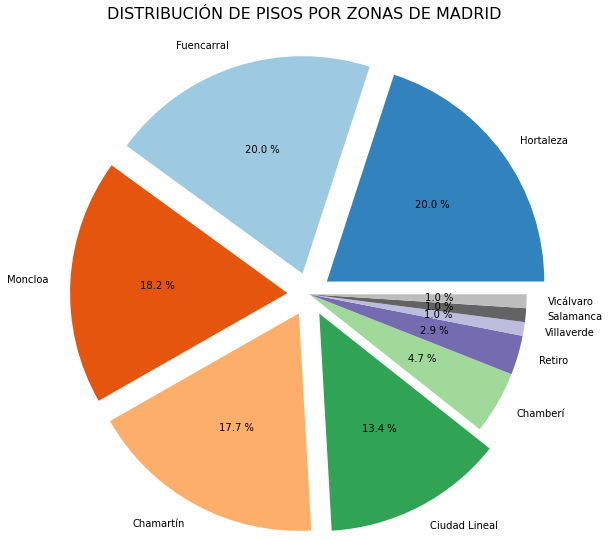

In [215]:
labels = ['Hortaleza', 'Fuencarral', 'Moncloa', 'Chamartín', 'Ciudad Lineal', 'Chamberí', 'Retiro', 'Villaverde', 'Salamanca', 'Vicálvaro']
explode = [0.2,0.2,0.2,0.2,0.2,0,0,0,0,0]
fig = plt.figure(figsize = (5,5))
theme = plt.get_cmap('tab20c')
plt.pie(dis_volumen, labels = labels, autopct = "%0.1f %%", radius = 2, explode = explode, colors = [theme(1. * i / len(labels)) for i in range(len(labels))])
plt.suptitle("DISTRIBUCIÓN DE PISOS POR ZONAS DE MADRID", y = 1.3, fontsize = 16)
plt.show()

##### 7. Precio medio de venta por distrito sólo de pisos según características del cliente ( m2 > 150, piscina, parking propio)

In [216]:
precio_medio_pisos = target2[(target2.distrito == 'Hortaleza') | (target2.distrito == 'Fuencarral') | (target2.distrito == 'Moncloa') | (target2.distrito == 'Chamartín') | (target2.distrito == 'Ciudad Lineal') | (target2.distrito == 'Chamberí') | (target2.distrito == 'Retiro') | (target2.distrito == 'Villaverde') | (target2.distrito == 'Salamanca') | (target2.distrito == 'Vicálvaro')].groupby("distrito")["precio_venta"].mean().sort_values(ascending = False).astype('int64')
precio_medio_pisos

distrito
Salamanca        1734285
Chamartín        1691755
Chamberí         1428187
Moncloa          1050490
Hortaleza         982090
Retiro            970900
Ciudad Lineal     959631
Fuencarral        778748
Vicálvaro         387357
Villaverde        295284
Name: precio_venta, dtype: int64

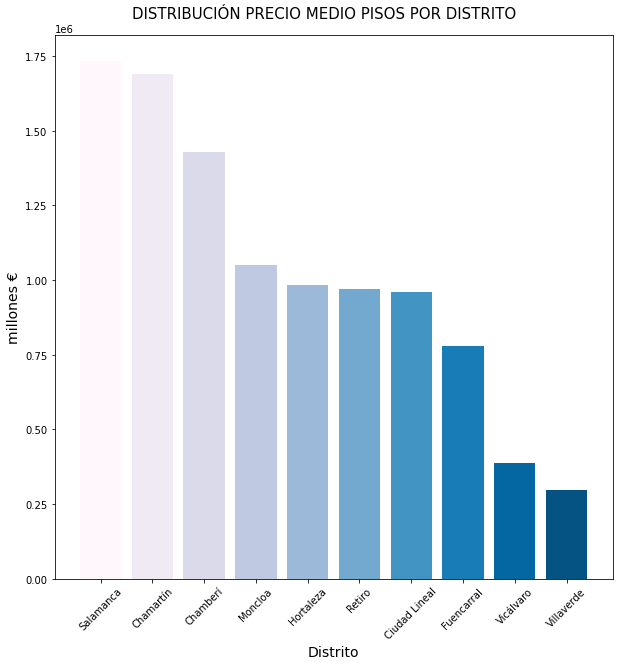

In [217]:
fig, ax = plt.subplots(figsize = (10,10))
x = ['Salamanca', 'Chamartín', 'Chamberí', 'Moncloa', 'Hortaleza', 'Retiro', 'Ciudad Lineal', 'Fuencarral', 'Vicálvaro', 'Villaverde']
theme1 = plt.get_cmap('PuBu')
plt.bar(x, precio_medio_pisos, color = [theme1(1. * i / len(x)) for i in range(len(x))])
ax.set_xticks(x)
ax.set_xticklabels(x, rotation = 45)
plt.xlabel("Distrito", fontsize = 14)
plt.ylabel("millones €", fontsize = 14)
plt.suptitle("DISTRIBUCIÓN PRECIO MEDIO PISOS POR DISTRITO", y = 0.92, fontsize = 15)
plt.show()

##### 8. Precio de venta según m2 construidos teniendo en cuenta sólo pisos y según características del cliente ( m2 > 150, piscina, parking propio)

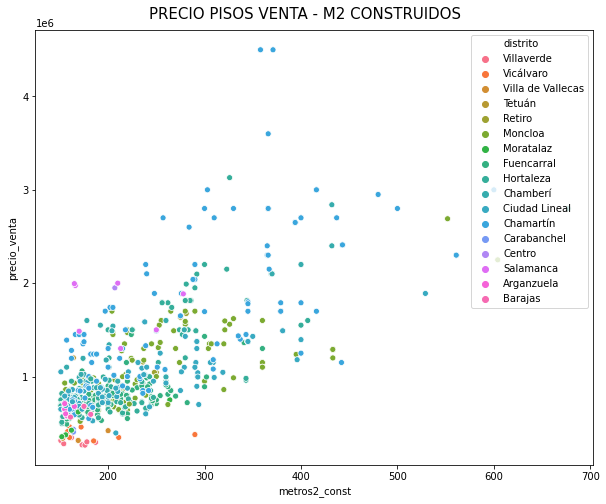

In [218]:
fig = plt.figure(figsize = (10,8))
sns.scatterplot(x = "metros2_const", y = "precio_venta", data = target2, hue = "distrito")
plt.suptitle("PRECIO PISOS VENTA - M2 CONSTRUIDOS", y = 0.92, fontsize = 15)
plt.show()

##### 9. Ofrecemos algunos activos en las zonas donde más volumen tenemos según características del cliente ( m2 > 150, piscina, parking propio)

In [219]:
casos2 = ['Hortaleza', 'Fuencarral', 'Moncloa', 'Chamartín']
for i in casos2:
    display(target2[["distrito", "barrio", "tipo", "metros2_const", "n_habitaciones", "n_banos", "precio_venta", "eurosm2_barrio"]][(target2.nueva_construccion == True) & (target2.distrito == i)].reset_index()[0:10])

,index,distrito,barrio,tipo,metros2_const,n_habitaciones,n_banos,precio_venta,eurosm2_barrio
0,330,Hortaleza,Valdebebas - Valdefuentes,Pisos,171.0,4,3.0,694300,3607.13
1,331,Hortaleza,Valdebebas - Valdefuentes,Pisos,159.0,3,2.0,636800,3607.13
2,332,Hortaleza,Valdebebas - Valdefuentes,Pisos,159.0,3,2.0,665200,3607.13
3,333,Hortaleza,Valdebebas - Valdefuentes,Pisos,171.0,4,3.0,664300,3607.13
4,334,Hortaleza,Valdebebas - Valdefuentes,Pisos,190.0,4,3.0,738500,3607.13
5,335,Hortaleza,Valdebebas - Valdefuentes,Pisos,156.0,4,3.0,570000,3607.13
6,338,Hortaleza,Valdebebas - Valdefuentes,Pisos,190.0,4,3.0,755400,3607.13
7,340,Hortaleza,Valdebebas - Valdefuentes,Pisos,156.0,4,2.0,652800,3607.13
8,345,Hortaleza,Conde Orgaz-Piovera,Pisos,262.0,4,5.0,1790000,4275.46
9,346,Hortaleza,Conde Orgaz-Piovera,Pisos,266.0,4,5.0,1740000,4275.46


,index,distrito,barrio,tipo,metros2_const,n_habitaciones,n_banos,precio_venta,eurosm2_barrio
0,185,Fuencarral,Fuentelarreina,Pisos,200.0,5,5.0,884000,3371.55
1,255,Fuencarral,Peñagrande,Pisos,173.0,4,3.0,1060000,3271.96
2,268,Fuencarral,Peñagrande,Pisos,187.0,4,3.0,800000,3271.96
3,269,Fuencarral,Las Tablas,Pisos,155.0,4,3.0,653429,4256.38
4,278,Fuencarral,Las Tablas,Pisos,155.0,4,3.0,671706,4256.38


,index,distrito,barrio,tipo,metros2_const,n_habitaciones,n_banos,precio_venta,eurosm2_barrio
0,60,Moncloa,Argüelles,Pisos,218.0,2,2.0,1019900,4807.69
1,67,Moncloa,Aravaca,Pisos,204.0,3,3.0,1700000,3600.4
2,68,Moncloa,Aravaca,Pisos,217.0,3,3.0,1350000,3600.4
3,69,Moncloa,Ciudad Universitaria,Pisos,265.0,4,5.0,1700000,3810.08
4,70,Moncloa,Ciudad Universitaria,Pisos,255.0,3,4.0,1600000,3810.08
5,77,Moncloa,Ciudad Universitaria,Pisos,252.0,5,6.0,1310000,3810.08
6,87,Moncloa,Ciudad Universitaria,Pisos,254.0,4,5.0,1365000,3810.08
7,97,Moncloa,Ciudad Universitaria,Pisos,326.0,5,6.0,1560000,3810.08
8,126,Moncloa,Ciudad Universitaria,Pisos,321.0,5,6.0,1595000,3810.08
9,156,Moncloa,Valdemarín,Pisos,205.0,4,3.0,1450000,4249.04


,index,distrito,barrio,tipo,metros2_const,n_habitaciones,n_banos,precio_venta,eurosm2_barrio
0,597,Chamartín,Bernabéu-Hispanoamérica,Pisos,257.0,4,5.0,2700000,5170.22
1,602,Chamartín,Castilla,Pisos,206.0,5,4.0,1013200,4354.35
2,604,Chamartín,Bernabéu-Hispanoamérica,Pisos,240.0,4,4.0,2100000,5170.22
3,605,Chamartín,Bernabéu-Hispanoamérica,Pisos,205.0,3,3.0,1740000,5170.22
4,617,Chamartín,Nueva España,Pisos,175.0,4,4.0,1372328,5363.75
